### Example 1: SVM Classification - Predicting if a city will receive a government grant

#### Step 1: Generate the Data

1. **Population**: Larger cities might be more likely to receive grants.
2. **Average Income**: Cities with lower average income might have higher chances of receiving grants.
3. **Unemployment Rate**: Higher unemployment rates might increase the chances of receiving grants.
4. **Education Level**: Cities with lower education levels might be prioritized for grants.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Generating data
np.random.seed(42)
n_samples = 200

population = np.random.randint(50000, 1000000, n_samples)
average_income = np.random.randint(20000, 100000, n_samples)
unemployment_rate = np.random.uniform(0, 0.2, n_samples)
education_level = np.random.uniform(0, 1, n_samples)

# Logical relationship for received_grant
received_grant = (
    (population > 300000) & 
    (average_income < 50000) & 
    (unemployment_rate > 0.1) & 
    (education_level < 0.6)
).astype(int)

# Creating a DataFrame
df_classification = pd.DataFrame({
    'population': population,
    'average_income': average_income,
    'unemployment_rate': unemployment_rate,
    'education_level': education_level,
    'received_grant': received_grant
})

In [3]:
# Splitting the data
X_class = df_classification.drop('received_grant', axis=1)
y_class = df_classification['received_grant']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

In [4]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

#### Step 2: Train SVM Classifier with Parameter Tuning

GridSearchCV to find the best parameters for C, gamma, and kernel.

In [5]:
# Parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [6]:
# SVM model
svc = SVC()

# Grid search
grid_search_class = GridSearchCV(svc, param_grid, refit=True, verbose=2, cv=5)
grid_search_class.fit(X_train_class, y_train_class)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [13]:
# Best parameters
print("Best parameters found: ", grid_search_class.best_params_)

Best parameters found:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [14]:
# Predictions
y_pred_class = grid_search_class.predict(X_test_class)

#### Step 3: Evaluate the Model

In [15]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.67      0.75      0.71         8

    accuracy                           0.92        60
   macro avg       0.81      0.85      0.83        60
weighted avg       0.92      0.92      0.92        60



In [16]:
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_class))

Confusion Matrix:
[[49  3]
 [ 2  6]]


In [17]:
# Accuracy
print("Accuracy Score:", accuracy_score(y_test_class, y_pred_class))

Accuracy Score: 0.9166666666666666


#### Step 4: Visualize the Results

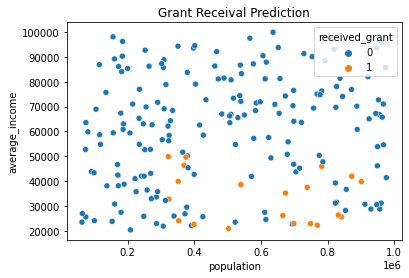

In [19]:
# Plotting the decision boundary for two features (population and average_income)
import seaborn as sns
sns.scatterplot(x='population', y='average_income', hue='received_grant', data=df_classification)
plt.title('Grant Receival Prediction')
plt.show()

### Example 2: SVM Regression - Predicting the amount of government subsidy

#### Step 1: Generate the Data

1. **Population**: Larger cities might receive more subsidies.
2. **Average Income**: Cities with lower average income might receive more subsidies.
3. **Unemployment Rate**: Higher unemployment rates might increase subsidy amounts.
4. **Education Level**: Cities with lower education levels might receive more subsidies.

In [20]:
# Generating data
np.random.seed(42)
n_samples = 200

population = np.random.randint(50000, 1000000, n_samples)
average_income = np.random.randint(20000, 100000, n_samples)
unemployment_rate = np.random.uniform(0, 0.2, n_samples)
education_level = np.random.uniform(0, 1, n_samples)

# Logical relationship for subsidy_amount
subsidy_amount = (
    5000 * (population / 100000) - 
    0.1 * average_income + 
    10000 * unemployment_rate - 
    2000 * education_level +
    np.random.normal(0, 10000, n_samples)  # Adding some noise
)

# Creating a DataFrame
df_regression = pd.DataFrame({
    'population': population,
    'average_income': average_income,
    'unemployment_rate': unemployment_rate,
    'education_level': education_level,
    'subsidy_amount': subsidy_amount
})

In [21]:
# Splitting the data
X_reg = df_regression.drop('subsidy_amount', axis=1)
y_reg = df_regression['subsidy_amount']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [22]:
# Standardizing the data
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

#### Step 2: Train SVM Regressor with Parameter Tuning

GridSearchCV to find the best parameters for C, gamma, and kernel.

In [23]:
from sklearn.svm import SVR

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [24]:
# SVM model
svr = SVR()

# Grid search
grid_search_reg = GridSearchCV(svr, param_grid, refit=True, verbose=2, cv=5)
grid_search_reg.fit(X_train_reg, y_train_reg)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [25]:
# Best parameters
print("Best parameters found: ", grid_search_reg.best_params_)

Best parameters found:  {'C': 100, 'gamma': 1, 'kernel': 'poly'}


In [26]:
# Predictions
y_pred_reg = grid_search_reg.predict(X_test_reg)

#### Step 3: Evaluate the Model

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("R2 Score:", r2_score(y_test_reg, y_pred_reg))

Mean Squared Error: 180483738.37104604
R2 Score: 0.38558273748581073


#### Step 4: Visualize the Results

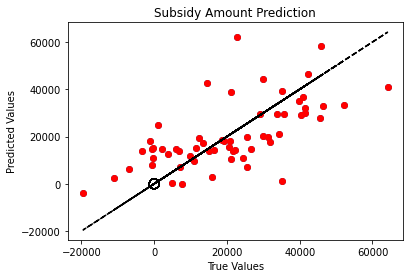

In [69]:
# Get the support vectors
support_vectors = grid_search_reg.best_estimator_.support_vectors_

# Plot the decision boundary and margins
plt.plot(y_test_reg, y_pred_reg, 'ro')
plt.scatter(y_test_reg, y_pred_reg)
plt.plot(y_test_reg, y_test_reg, color='black', linestyle='--')

# Plot support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Subsidy Amount Prediction")
plt.show()

### Key Parameters

1. **C**: Regularization parameter. It controls the trade-off between achieving a low training error and a low testing error (overfitting). A smaller value of C makes the decision surface smooth, while a larger value of C aims to classify all training examples correctly.

2. **gamma**: Kernel coefficient for 'rbf', 'poly', and 'sigmoid'. It defines how far the influence of a single training example reaches. Low values mean 'far' and high values mean 'close'. When gamma is low, the decision boundary is very smooth; when gamma is high, the decision boundary tries to follow the training data closely.

3. **kernel**: Specifies the kernel type to be used in the algorithm. It can be 'linear', 'poly', 'rbf', or 'sigmoid'. The 'rbf' kernel is a popular choice that maps the data into higher-dimensional space for non-linear classification or regression.